In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv(f'/content/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [5]:
print(df.size)
df.columns


1200


Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [9]:
df.dtypes

,0
User ID,int64
Age,int64
Gender,object
Sleep Quality,int64
Bedtime,object
Wake-up Time,object
Daily Steps,int64
Calories Burned,int64
Physical Activity Level,object
Dietary Habits,object


In [10]:
print("\n❌ Missing Values:")
print(df.isnull().sum())


❌ Missing Values:
User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64


In [11]:
# Convert Time columns to datetime format
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%H:%M').dt.time
df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time'], format='%H:%M').dt.time

In [12]:
# ✅ Summary Statistics
print("\n📌 Summary Statistics:")
print(df.describe())


📌 Summary Statistics:
          User ID         Age  Sleep Quality   Daily Steps  Calories Burned
count  100.000000  100.000000     100.000000    100.000000        100.00000
mean    50.500000   36.010000       7.000000   6830.000000       2421.00000
std     29.011492    8.454865       1.734964   2498.706736        281.06759
min      1.000000   22.000000       4.000000   3000.000000       2000.00000
25%     25.750000   28.750000       5.750000   4750.000000       2175.00000
50%     50.500000   35.000000       7.500000   6750.000000       2400.00000
75%     75.250000   44.000000       8.250000   9000.000000       2700.00000
max    100.000000   50.000000       9.000000  11000.000000       2900.00000


In [13]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [16]:
print(df.isnull().sum())

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64


In [17]:
df.duplicated().sum()

0

In [18]:
df.drop(['User ID'],inplace=True,axis=1)

In [19]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00:00,06:30:00,8000,2500,medium,healthy,no,no
1,34,m,7,00:30:00,07:00:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45:00,06:45:00,9000,2700,high,healthy,no,no
3,41,m,5,01:00:00,06:30:00,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30:00,07:00:00,10000,2800,high,medium,no,no


## **Age vs Sleep Quality Analysis**##


In [20]:
age_sleep_quality_corr = df[['Age', 'Sleep Quality']].corr()
print(age_sleep_quality_corr)

                    Age  Sleep Quality
Age            1.000000      -0.848356
Sleep Quality -0.848356       1.000000


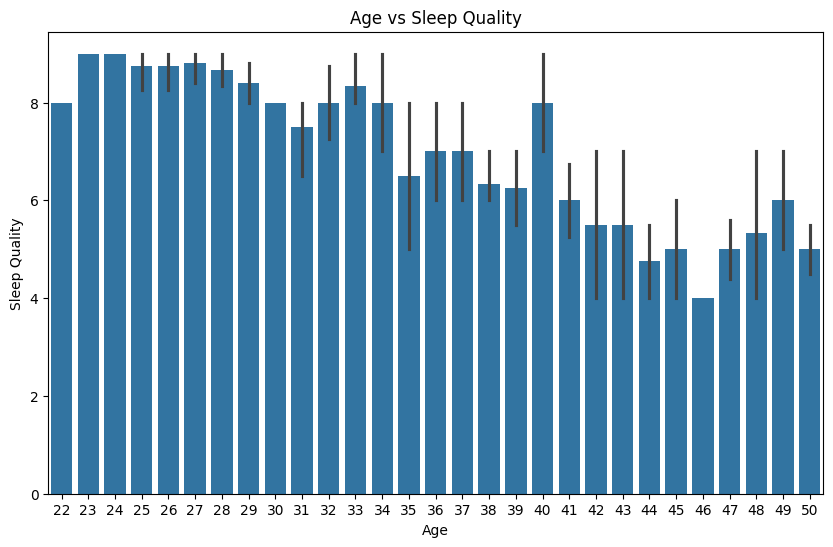

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age', y='Sleep Quality')
plt.title('Age vs Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression


x = df[['Age']]
y = df['Sleep Quality']

age_sleep_qulity_model = LinearRegression()
age_sleep_qulity_model.fit(x, y)

y_pred = model.predict(x)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
age_sleep_qulity_model.intercept_

13.268812023190648

In [31]:
age_sleep_qulity_model.coef_

array([-0.17408531])

In [34]:
age_sleep_qulity_model_predictions = age_sleep_qulity_model.predict(x)

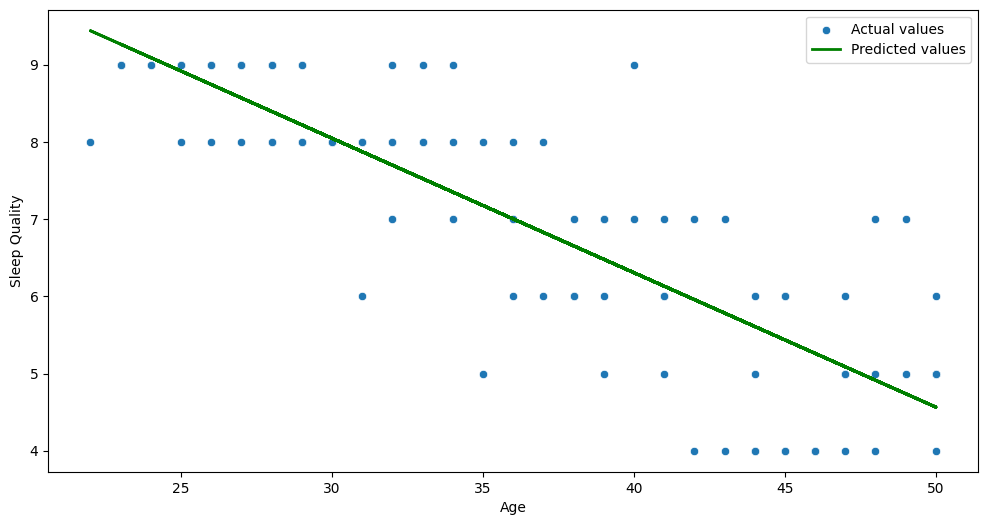

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Sleep Quality', label='Actual values')
# plt.xlabel('Age')
# plt.ylabel('Sleep Quality')
# plt.plot(x, y_pred, color='red', linewidth=2)
plt.plot(x,age_sleep_qulity_model_predictions,color='green',linewidth=2,label = 'Predicted values')
plt.legend()
plt.show()

##**Pysical Activity vs Sleep Quality**##

In [39]:
df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [40]:
df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


<Axes: xlabel='Gender', ylabel='Sleep Quality'>

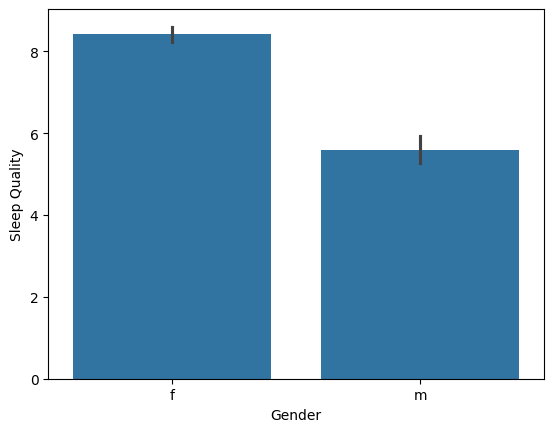

In [41]:
sns.barplot(x= 'Gender', y = 'Sleep Quality', data = df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

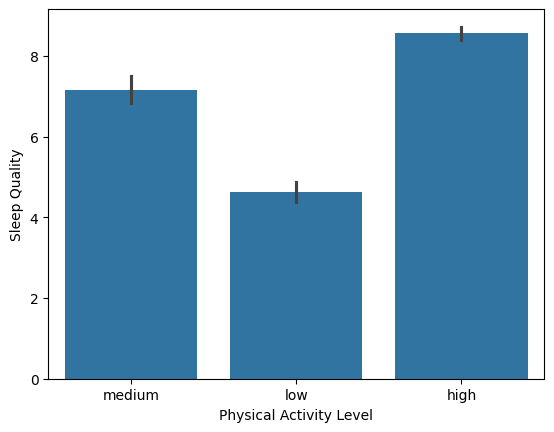

In [42]:
sns.barplot(x= 'Physical Activity Level', y = 'Sleep Quality', data = df)

In [70]:
df['Physical Activity Level'] = df['Physical Activity Level'].map({'low': 1, 'medium': 2, 'high': 3})
df['Physical Activity Level'].head()

,Physical Activity Level
0,2
1,1
2,3
3,1
4,3


<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

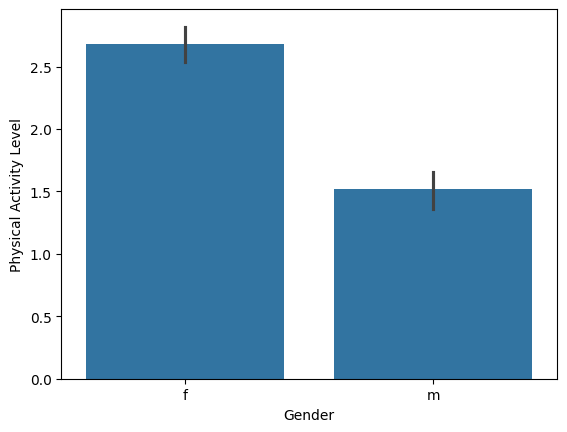

In [48]:
sns.barplot(x='Gender', y = 'Physical Activity Level',data = df)

In [49]:
from scipy import  stats
sleep_quality_males = df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females = df[df['Gender']=='f']['Sleep Quality']

physical_activity_males = df[df['Gender']=='m']['Physical Activity Level']
physical_activity_females = df[df['Gender']=='f']['Physical Activity Level']

# Perform the t-test

###   Lets find out t and p value for Sleep Quality vs Gender and Physical Activity vs Gender

In [57]:
t_sleep_quality_gender, p_sleep_quality_gender = stats.ttest_ind(sleep_quality_males, sleep_quality_females)
print(f't_sleep_quality_gender:{t_sleep_quality_gender:.2f} p_sleep_quality_gender:{p_sleep_quality_gender:.2f}')

t_sleep_quality_gender:-14.32 p_sleep_quality_gender:0.00


In [58]:
t_physical, p_physical = stats.ttest_ind(physical_activity_males, physical_activity_females)
print(f't_physical:{t_physical:.2f} p_physical:{p_physical:.2f}')

t_physical:-10.98 p_physical:0.00


### Time of sleep and Waking up vs Sleep Quality


In [69]:
df['Bedtime'].head()

,Bedtime
0,23:00
1,00:30
2,22:45
3,01:00
4,23:30


In [74]:
def sleep_time_helper_function(str_time):
  h = str_time.split(':')[0]
  m = str_time.split(':')[1]
  return int(h) +int(m)/60

# df['Bedtime'] = df['Bedtime'].apply(sleep_time_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_time_helper_function)

In [72]:
df['Bedtime' ].head()

,Bedtime
0,23.00
1,0.50
2,22.75
3,1.00
4,23.50


In [78]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime'])%24
df['Sleep Duration Hours'].head()

,Sleep Duration Hours
0,7.5
1,6.5
2,8.0
3,5.5
4,7.5


In [79]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,1,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,2,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,3,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,4,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,5,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


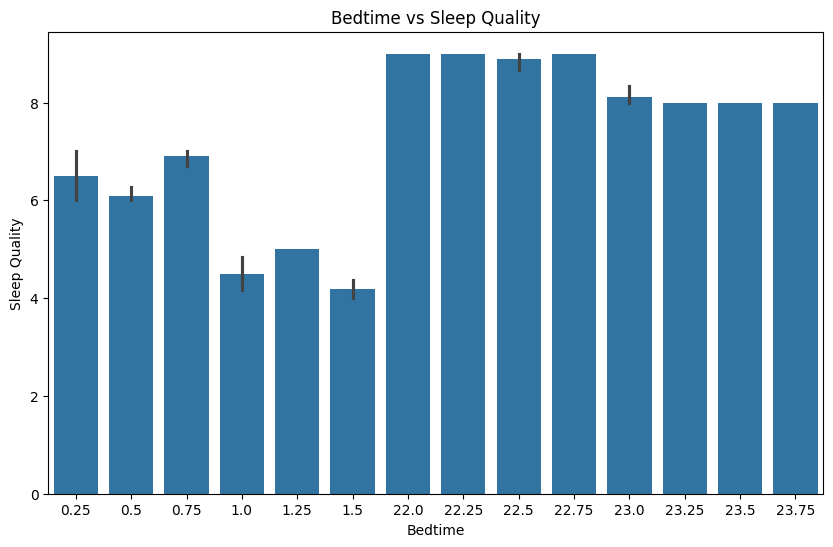

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Bedtime', y='Sleep Quality')
plt.title('Bedtime vs Sleep Quality')
plt.xlabel('Bedtime')
plt.ylabel('Sleep Quality')
plt.show()

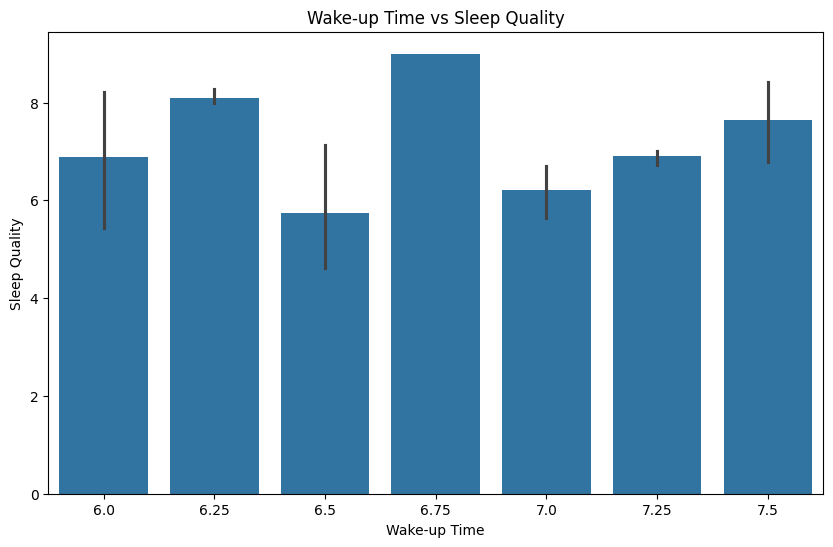

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Wake-up Time', y='Sleep Quality')
plt.title('Wake-up Time vs Sleep Quality')
plt.xlabel('Wake-up Time')
plt.ylabel('Sleep Quality')
plt.show()

Text(0, 0.5, 'Sleep Quality')

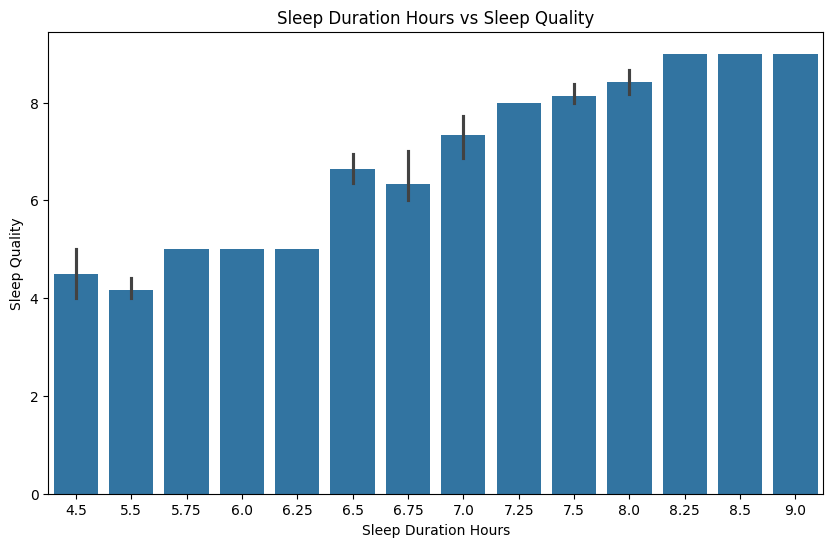

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sleep Duration Hours', y='Sleep Quality')
plt.title('Sleep Duration Hours vs Sleep Quality')
plt.xlabel('Sleep Duration Hours')
plt.ylabel('Sleep Quality')

In [85]:
sleep_duration_qulity_model = LinearRegression()
sleep_duration_qulity_model.fit(df[['Sleep Duration Hours']], df['Sleep Quality'])

LinearRegression()

In [86]:
sleep_duration_qulity_model.coef_

array([1.36940999])

In [87]:
sleep_duration_qulity_model.intercept_

-2.575599349763152

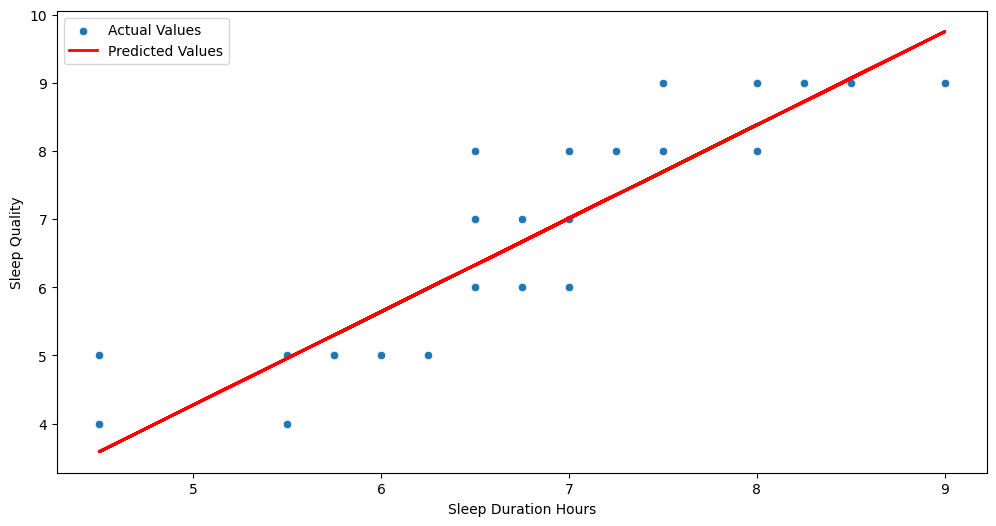

In [89]:
duration_qulity_predictions = sleep_duration_qulity_model.predict(df[['Sleep Duration Hours']])

plt.figure(figsize=(12, 6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Values')
plt.plot(df['Sleep Duration Hours'], duration_qulity_predictions, color = 'red', linewidth = 2, label = 'Predicted Values')
plt.legend()
plt.show()